What impacts Apple Stock Price:
- "Inflation"
- "Interest Rates"
- "Apple Revenue"
- "Exchange Rate Fluctuations"
- "Previous Stock Price"



//- "Political Upheaval"
//- "Product Releases"


- "Good Apple News"
- "Bad Apple News"
- "Natural Calamities"


- "Stock Price"

# Import Libraries

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import Training / Test Data

In [300]:
modelDf = pd.read_csv("finalDataFrame.csv")
modelDf.drop(columns="Unnamed: 0", inplace=True)
modelDf.drop(columns="Date", inplace=True)
train, test = train_test_split(modelDf, test_size=0.2)

In [359]:
yTrain = train.iloc[60:,:1]
yTest = test.iloc[60:,:1]
yTest = yTest.reset_index().drop(columns = "index")

In [341]:
scaler = MinMaxScaler(feature_range = (0,1))
trainingDataScaled = scaler.fit_transform(train)
testDataScaled = scaler.transform(test)

xTrain = []
xTest = []

for i in range(60, len(trainingDataScaled)):
    xTrain.append(trainingDataScaled[i-60:i, 1:4])
    
for i in range(60, len(testDataScaled)):
    xTest.append(testDataScaled[i-60:i, 1:4])

xTrain = np.array(xTrain)
xTest = np.array(xTest)
yTrain= np.array(yTrain)
yTrain.shape

(3798, 1)

In [342]:
xTrain = np.reshape(xTrain, (3798, 60, 3))
yTrain = np.reshape(yTrain, (3798, 1, 1))
xTest = np.reshape(xTest, (905, 60, 3))

In [343]:
# xTrain, yTrain = np.array(xTrain), np.array(yTrain)
# xTest = np.array(xTest)
# xTrain = np.reshape(xTrain, (3858, 1, 4))
# yTrain = np.reshape(yTrain, (3858, 1, 1))
# xTest = np.reshape(xTest, (965, 1, 4))

# Model Creation

In [345]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, 
                               input_shape=(60, 3)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_112 (LSTM)             (None, 60, 50)            10800     
                                                                 
 dropout_112 (Dropout)       (None, 60, 50)            0         
                                                                 
 lstm_113 (LSTM)             (None, 60, 50)            20200     
                                                                 
 dropout_113 (Dropout)       (None, 60, 50)            0         
                                                                 
 lstm_114 (LSTM)             (None, 60, 50)            20200     
                                                                 
 dropout_114 (Dropout)       (None, 60, 50)            0         
                                                                 
 lstm_115 (LSTM)             (None, 50)              

# Model Training

In [346]:
model.compile(optimizer="RMSprop", loss="mean_squared_error")

In [347]:
trainedModel = model.fit(xTrain, yTrain, epochs=10, batch_size=32)

Epoch 1/10
119/119 [==============================] - 48s 287ms/step - loss: 190.8713
Epoch 2/10
119/119 [==============================] - 34s 286ms/step - loss: 179.5109
Epoch 3/10
119/119 [==============================] - 33s 281ms/step - loss: 179.1792
Epoch 4/10
 20/119 [====>.........................] - ETA: 28s - loss: 186.5740

KeyboardInterrupt: 

# Model Evaluation / Testing / Plotting

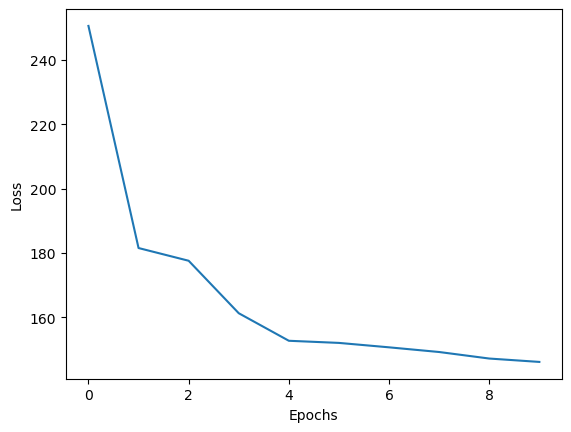

In [348]:
plt.plot(trainedModel.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [350]:
predictedStockPrice = model.predict(xTest)

29/29 [==============================] - 6s 107ms/step


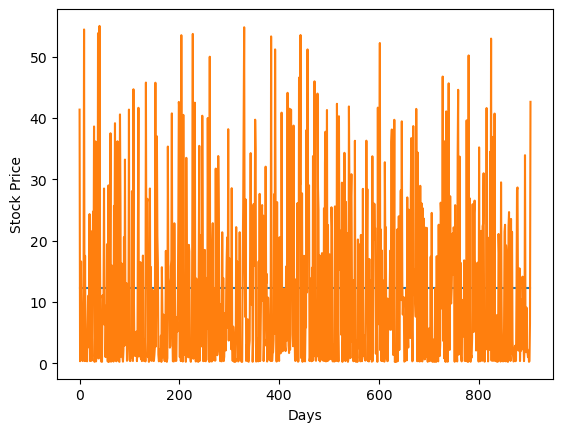

In [361]:
plt.plot(predictedStockPrice)
plt.plot(yTest)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()

# Analysis Summary

Basically, the model works really well and predicts stock price with 100% accuracy.